In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


MODEL A - DANE BEZ PORY ROKU

In [12]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
12418555,1.0,7.0,0.996528,0.0
12418556,1.0,7.0,0.997222,0.0
12418557,1.0,7.0,0.997917,0.0
12418558,1.0,7.0,0.998611,0.0


In [13]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
77616/77616 [==============================] - 61s 779us/step - loss: 0.7072 - mae: 0.1653
Epoch 2/5
77616/77616 [==============================] - 60s 773us/step - loss: 0.7045 - mae: 0.1642
Epoch 3/5
77616/77616 [==============================] - 60s 771us/step - loss: 0.7045 - mae: 0.1642
Epoch 4/5
77616/77616 [==============================] - 60s 772us/step - loss: 0.7045 - mae: 0.1642
Epoch 5/5
77616/77616 [==============================] - 60s 775us/step - loss: 0.7045 - mae: 0.1642


In [15]:
model.evaluate(x_test, y_test, batch_size=128)

19404/19404 [==============================] - 12s 604us/step - loss: 0.7078 - mae: 0.1677


[0.7077890634536743, 0.16765539348125458]

113/113 [==============================] - 0s 679us/step


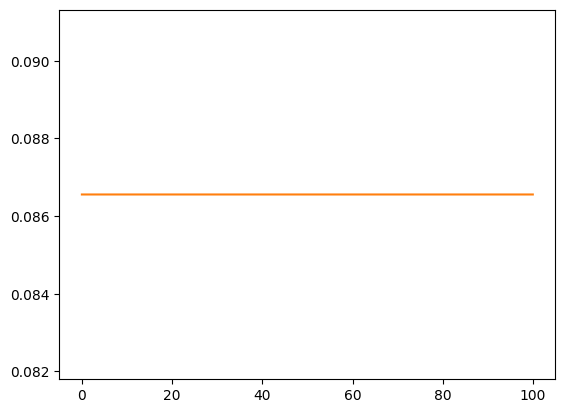

In [16]:
flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


In [17]:
def build_and_compile_model_input_1():
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss="mse",
                    metrics=['mae'])
      return model

def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

Epoch 1/5
11088/11088 [==============================] - 9s 774us/step - loss: 0.8391 - mae: 0.1925
Epoch 2/5
11088/11088 [==============================] - 9s 771us/step - loss: 0.8298 - mae: 0.1865
Epoch 3/5
11088/11088 [==============================] - 9s 777us/step - loss: 0.8291 - mae: 0.1860
Epoch 4/5
11088/11088 [==============================] - 9s 776us/step - loss: 0.8291 - mae: 0.1861
Epoch 5/5
113/113 [==============================] - 0s 586us/step


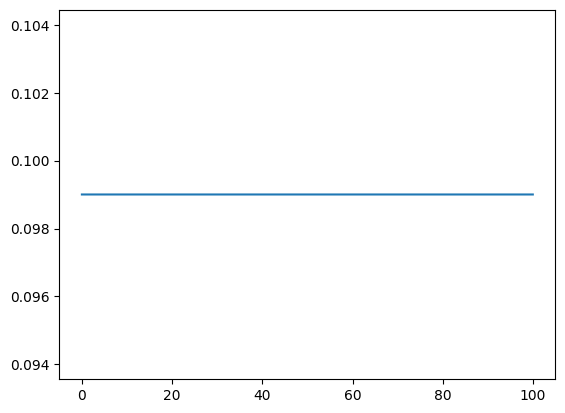

In [18]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pon=np.arange(0,100,100/3600) 
flow_result_pon = model.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(3600))

WTOREK

Epoch 1/5
11088/11088 [==============================] - 9s 757us/step - loss: 0.6416 - mae: 0.1526
Epoch 2/5
11088/11088 [==============================] - 8s 752us/step - loss: 0.6276 - mae: 0.1487
Epoch 3/5
11088/11088 [==============================] - 8s 755us/step - loss: 0.6276 - mae: 0.1487
Epoch 4/5
11088/11088 [==============================] - 8s 755us/step - loss: 0.6276 - mae: 0.1487
Epoch 5/5
113/113 [==============================] - 0s 562us/step


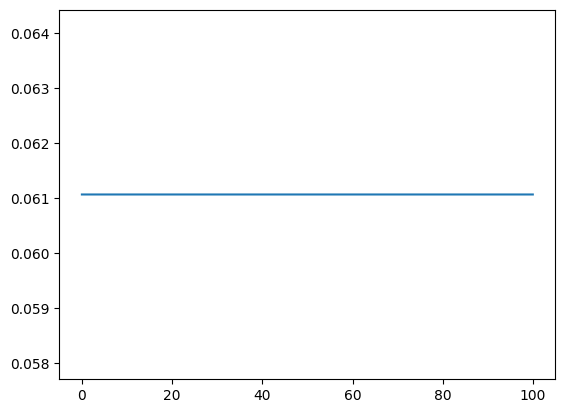

In [19]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_wt=np.arange(0,100,100/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(3600))

ŚRODA

Epoch 1/5
11088/11088 [==============================] - 9s 757us/step - loss: 0.7249 - mae: 0.1705
Epoch 2/5
11088/11088 [==============================] - 8s 749us/step - loss: 0.7118 - mae: 0.1654
Epoch 3/5
11088/11088 [==============================] - 8s 755us/step - loss: 0.7118 - mae: 0.1653
Epoch 4/5
11088/11088 [==============================] - 8s 759us/step - loss: 0.7118 - mae: 0.1653
Epoch 5/5
113/113 [==============================] - 0s 572us/step


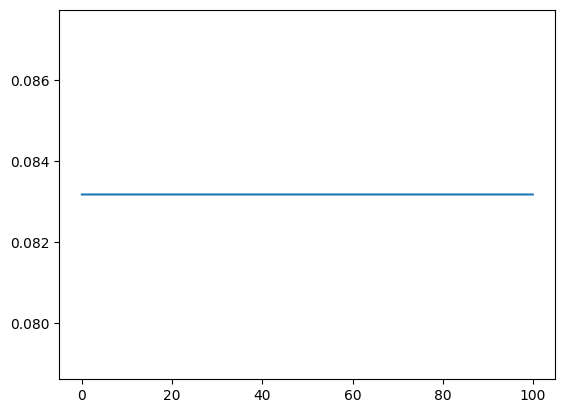

In [20]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sr=np.arange(0,100,100/3600)  
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(3600))

CZWARTEK

Epoch 1/5
11088/11088 [==============================] - 9s 764us/step - loss: 0.7184 - mae: 0.1684
Epoch 2/5
11088/11088 [==============================] - 8s 758us/step - loss: 0.6969 - mae: 0.1604
Epoch 3/5
11088/11088 [==============================] - 8s 761us/step - loss: 0.6981 - mae: 0.1591
Epoch 4/5
11088/11088 [==============================] - 8s 758us/step - loss: 0.6981 - mae: 0.1591
Epoch 5/5
113/113 [==============================] - 0s 576us/step


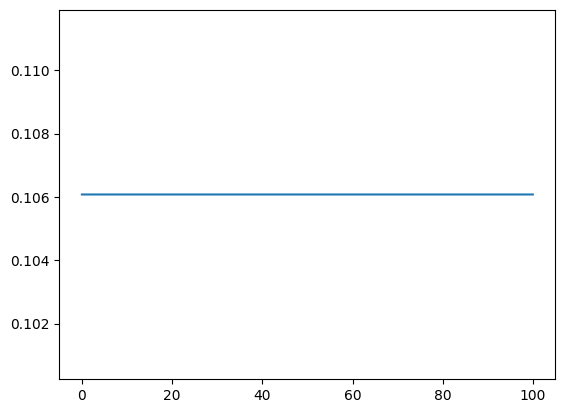

In [21]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_czw=np.arange(0,100,100/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(3600))

PIĄTEK

Epoch 1/5
11088/11088 [==============================] - 9s 760us/step - loss: 0.6318 - mae: 0.1618
Epoch 2/5
11088/11088 [==============================] - 8s 753us/step - loss: 0.6251 - mae: 0.1581
Epoch 3/5
11088/11088 [==============================] - 8s 761us/step - loss: 0.6251 - mae: 0.1581
Epoch 4/5
11088/11088 [==============================] - 8s 747us/step - loss: 0.6251 - mae: 0.1581
Epoch 5/5
113/113 [==============================] - 0s 586us/step


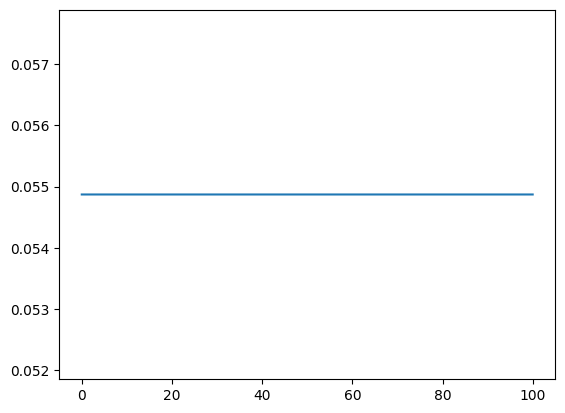

In [22]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pt=np.arange(0,100,100/3600)  
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(3600))

SOBOTA

Epoch 1/5
11088/11088 [==============================] - 9s 768us/step - loss: 0.5865 - mae: 0.1480
Epoch 2/5
11088/11088 [==============================] - 8s 760us/step - loss: 0.5770 - mae: 0.1419
Epoch 3/5
11088/11088 [==============================] - 8s 755us/step - loss: 0.5770 - mae: 0.1419
Epoch 4/5
11088/11088 [==============================] - 8s 756us/step - loss: 0.5770 - mae: 0.1419
Epoch 5/5
113/113 [==============================] - 0s 568us/step


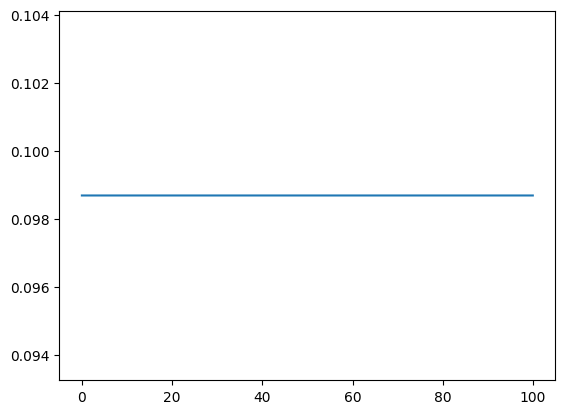

In [23]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sob=np.arange(0,100,100/3600) 
flow_result_sob = model.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(3600))

NIEDZIELA

Epoch 1/5
22176/22176 [==============================] - 16s 724us/step - loss: 0.8648 - mae: 0.1924
Epoch 2/5
22176/22176 [==============================] - 16s 722us/step - loss: 0.8426 - mae: 0.1874
Epoch 3/5
22176/22176 [==============================] - 16s 724us/step - loss: 0.8427 - mae: 0.1874
Epoch 4/5
22176/22176 [==============================] - 17s 746us/step - loss: 0.8427 - mae: 0.1874
Epoch 5/5
113/113 [==============================] - 0s 593us/step


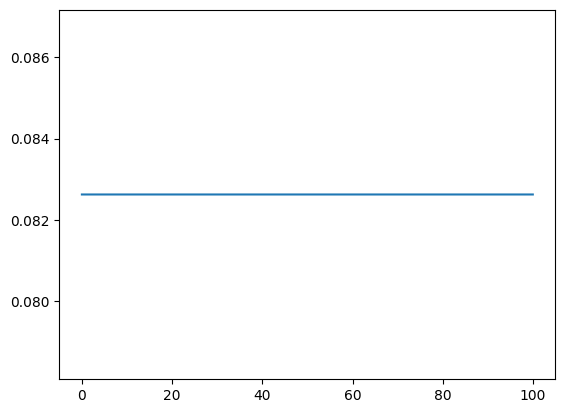

In [24]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=64)

flow_time_dn=np.arange(0,100,100/3600) 
flow_result_dn = model.predict(flow_time_dn)   

plt.plot(flow_time_dn, flow_result_dn.reshape(3600))

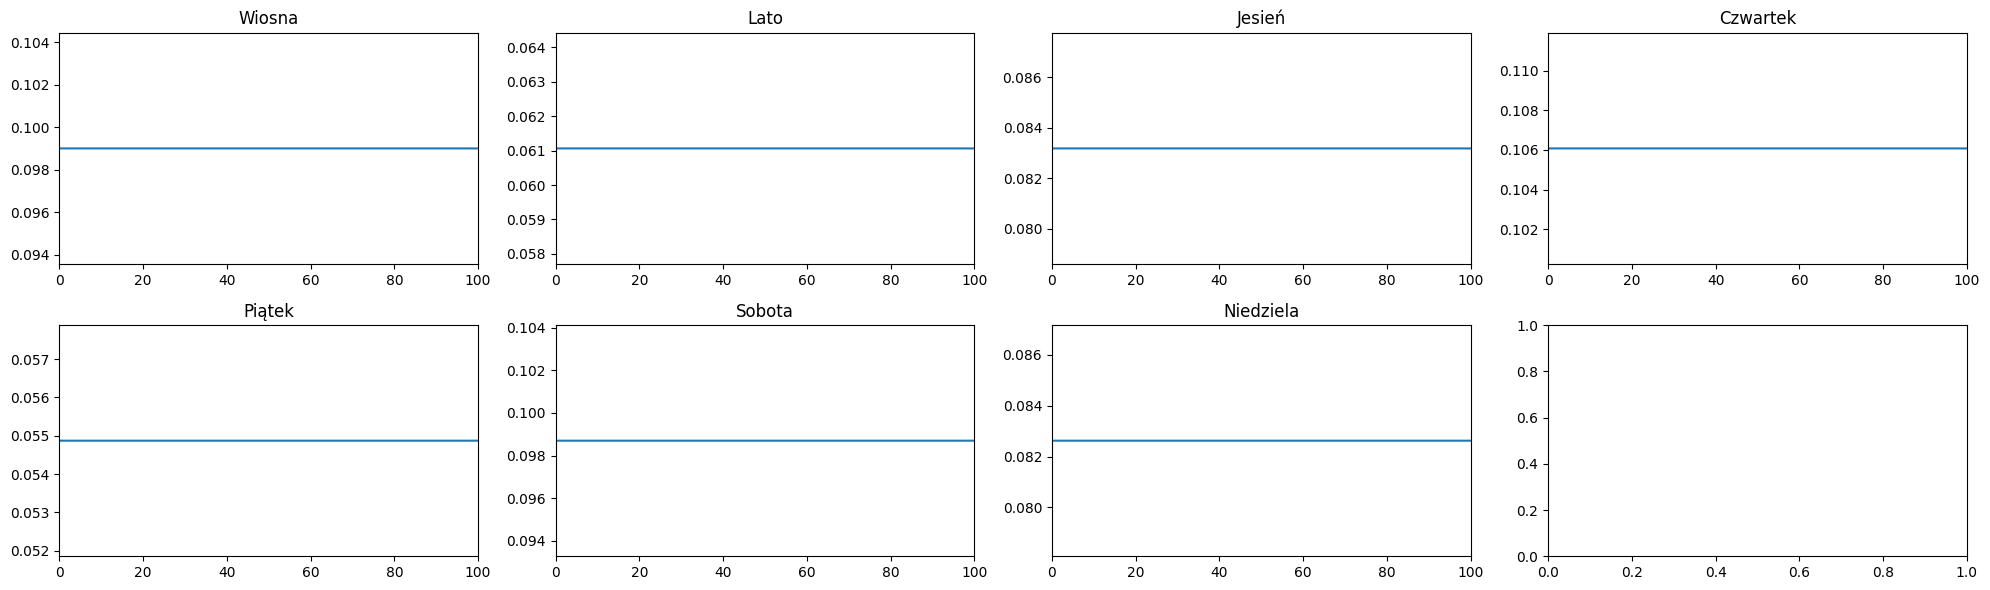

In [25]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - DODANIE PORY ROKU

In [26]:
def build_and_compile_model_input_3():
      model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1,activation='linear') 
      ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss="mse",
                    metrics=['mae'])
      return model

def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/5
77616/77616 [==============================] - 66s 838us/step - loss: 0.7060 - mae: 0.1651
Epoch 2/5
77616/77616 [==============================] - 62s 799us/step - loss: 0.7045 - mae: 0.1642
Epoch 3/5
77616/77616 [==============================] - 62s 801us/step - loss: 0.7045 - mae: 0.1642
Epoch 4/5
77616/77616 [==============================] - 61s 788us/step - loss: 0.7045 - mae: 0.1642
Epoch 5/5
113/113 [==============================] - 0s 601us/step


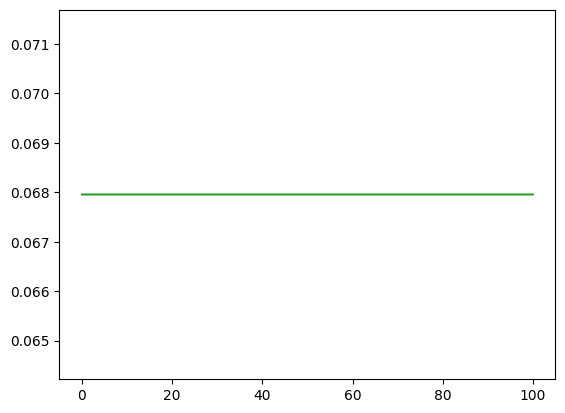

In [27]:
dataset = pd.read_csv('../dane_scalone.csv')


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input_3()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/5
19404/19404 [==============================] - 16s 773us/step - loss: 0.7618 - mae: 0.1791
Epoch 2/5
19404/19404 [==============================] - 15s 774us/step - loss: 0.7512 - mae: 0.1752
Epoch 3/5
19404/19404 [==============================] - 15s 769us/step - loss: 0.7512 - mae: 0.1752
Epoch 4/5
19404/19404 [==============================] - 15s 767us/step - loss: 0.7512 - mae: 0.1752
Epoch 5/5
113/113 [==============================] - 0s 585us/step


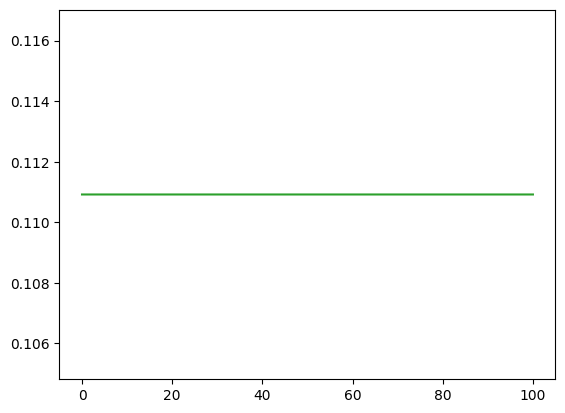

In [28]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_spring=np.arange(0,100,100/3600) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring, dtype=int),1*np.ones_like(flow_time_spring, dtype=int),flow_time_spring)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring, flow_result_spring)

LATO

Epoch 1/5
19404/19404 [==============================] - 16s 805us/step - loss: 0.4861 - mae: 0.1338
Epoch 2/5
19404/19404 [==============================] - 15s 794us/step - loss: 0.4829 - mae: 0.1305
Epoch 3/5
19404/19404 [==============================] - 15s 790us/step - loss: 0.4829 - mae: 0.1305
Epoch 4/5
19404/19404 [==============================] - 15s 793us/step - loss: 0.4829 - mae: 0.1305
Epoch 5/5
113/113 [==============================] - 0s 616us/step


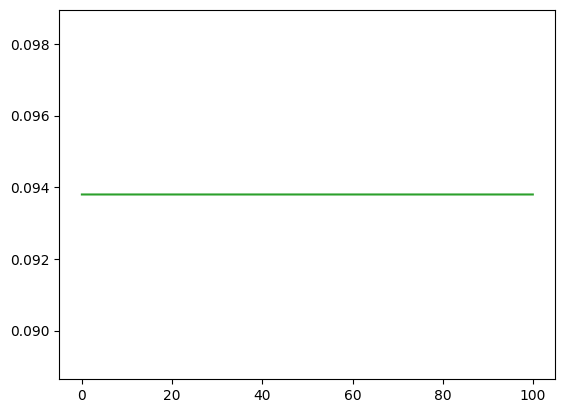

In [29]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_summer=np.arange(0,100,100/3600) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer, dtype=int),1*np.ones_like(flow_time_summer, dtype=int),flow_time_summer)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer, flow_result_summer)

JESIEŃ

Epoch 1/5
19404/19404 [==============================] - 16s 799us/step - loss: 0.6917 - mae: 0.1626
Epoch 2/5
19404/19404 [==============================] - 16s 804us/step - loss: 0.6671 - mae: 0.1592
Epoch 3/5
19404/19404 [==============================] - 16s 802us/step - loss: 0.6671 - mae: 0.1592
Epoch 4/5
19404/19404 [==============================] - 16s 804us/step - loss: 0.6671 - mae: 0.1592
Epoch 5/5
113/113 [==============================] - 0s 577us/step


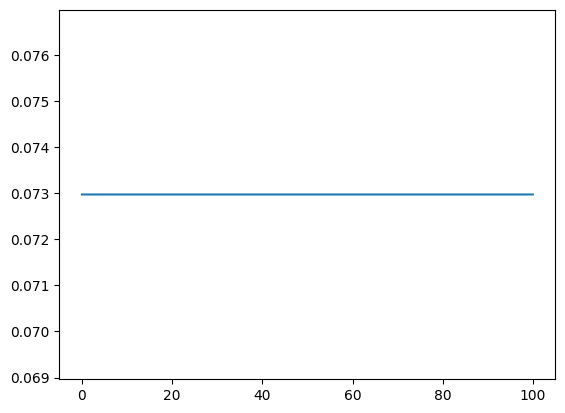

In [33]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_fall_plot=np.arange(0,100,100/3600) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall_plot, flow_result_fall)

ZIMA

Epoch 1/5
19404/19404 [==============================] - 16s 803us/step - loss: 0.9441 - mae: 0.1993
Epoch 2/5
19404/19404 [==============================] - 16s 808us/step - loss: 0.9234 - mae: 0.1934
Epoch 3/5
19404/19404 [==============================] - 15s 795us/step - loss: 0.9233 - mae: 0.1934
Epoch 4/5
19404/19404 [==============================] - 15s 789us/step - loss: 0.9234 - mae: 0.1934
Epoch 5/5
113/113 [==============================] - 0s 624us/step


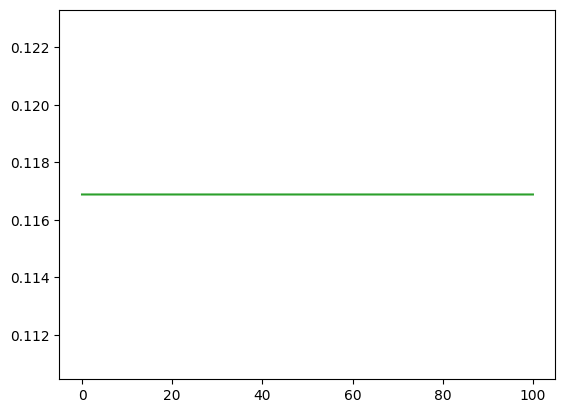

In [31]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_winter=np.arange(0,100,100/3600) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter, dtype=int),1*np.ones_like(flow_time_winter, dtype=int),flow_time_winter)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter, flow_result_winter)

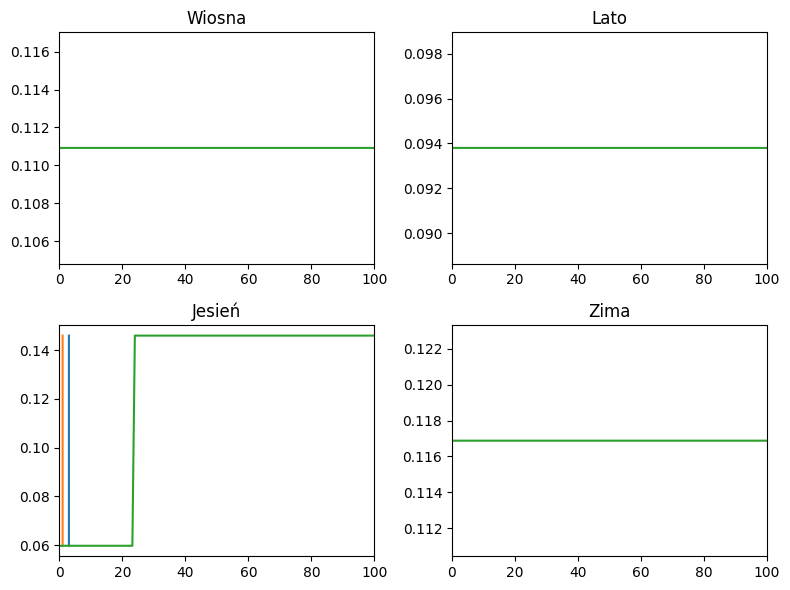

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()